<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/iamtomato761/HW4.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q nbqa mypy

# Exercise 1 - Debugging Type Errors

In [2]:
import qutip

In [3]:
# gotta install

!pip install qutip
import qutip

In [4]:
def photon_count(state: qutip.Qobj) -> int:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        ???: Photon number expectation value.
    """
    return qutip.expect(qutip.num(10), state)  # Returns float!

In [5]:
# Change return type

def photon_count(state: qutip.Qobj) -> float:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        float: Photon number expectation value.
    """
    return qutip.expect(qutip.num(10), state)

In [6]:
photon_count(qutip.coherent(10, 1))

0.9999999259365113

In [7]:
def create_fock_state(n: float, dims: int) -> qutip.Qobj:
    """
    Type enforcement prevents:
    create_fock_state(2.5, 10)  # Error: n must be integer!
    """
    return qutip.fock(dims, n)

In [8]:
# Code should prevent passing a non-integer value for n

from typing import cast

def create_fock_state(n: float, dims: int) -> qutip.Qobj:
    """
    Creates a Fock state with type enforcement.

    Parameters:
        n: The desired Fock state (must be an integer).
        dims: The dimension of the Hilbert space.

    Returns:
        The Fock state as a qutip.Qobj.

    Raises:
        TypeError: If n is not an integer.
    """
    if not isinstance(n, int):
        raise TypeError("n must be an integer")
    n_int = cast(int, n)  # Cast n to int for type checking
    return qutip.fock(dims, n_int)

In [10]:
create_fock_state(2.5, 10)

TypeError: n must be an integer

In [11]:
# Make it so n can be converted to an integer

def create_fock_state(n: float, dims: int) -> qutip.Qobj:
    """
    Creates a Fock state with type enforcement, converting float input to int.

    Parameters:
        n: The desired Fock state (can be float, will be converted to int).
        dims: The dimension of the Hilbert space.

    Returns:
        The Fock state as a qutip.Qobj.

    Raises:
        TypeError: If n is not an integer after conversion.
    """
    n_int = int(n)  # Convert n to an integer

    import warnings # Converting can cause data loss
    if n != n_int:
        warnings.warn(f"Input 'n' ({n}) was converted to integer ({n_int})")

    return qutip.fock(dims, n_int)

In [12]:
create_fock_state(2.5, 10)

<ipython-input-11-146e1b1a154a>:21: UserWarning: Input 'n' (2.5) was converted to integer (2)
  warnings.warn(f"Input 'n' ({n}) was converted to integer ({n_int})")


Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [14]:
def create_coherent_state(alpha: complex, dimension: float) -> int:
    """
    Creates a coherent state |α⟩ using QuTiP.

    Parameters:
        alpha (complex): Complex displacement parameter.
        dimension (int): Hilbert space size.

    Returns:
        qutip.Qobj: The coherent state |α⟩.
    """
    return qutip.coherent(dimension, alpha)

def photon_number_expectation(state: string) -> Qobj:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (???): Quantum state.

    Returns:
        ???: Photon number expectation value.
    """
    return qutip.expect(qutip.num(state.dims), state)

NameError: name 'string' is not defined

In [15]:
import qutip

def create_coherent_state(alpha: complex, dimension: int) -> qutip.Qobj:
    """
    Creates a coherent state |α⟩ using QuTiP.

    Parameters:
        alpha (complex): Complex displacement parameter.
        dimension (int): Hilbert space size.

    Returns:
        qutip.Qobj: The coherent state |α⟩.
    """
    return qutip.coherent(dimension, alpha)

def photon_number_expectation(state: qutip.Qobj) -> float:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        float: Photon number expectation value.
    """
    n_op = qutip.num(state.dims[0])  # Create photon number operator
    return qutip.expect(n_op, state)  # Calculate and return expectation value

# Exercise 2 - Quantum States in QuTiP

## Exercise 2.1 - Creating Fock States

In [16]:
# prompt: Create the Fock state |n> for n=0,1,2 using QuTiP
# Hints: Use fock to generate number states

import qutip

def create_fock_state(n: int, dims: int) -> qutip.Qobj:
    """Creates a Fock state |n⟩.

    Args:
        n: The number of photons in the Fock state.
        dims: The dimension of the Hilbert space.

    Returns:
        The Fock state |n⟩ as a QuTiP Qobj.
    """
    return qutip.fock(dims, n)

# Create Fock states |0⟩, |1⟩, and |2⟩
fock_0 = create_fock_state(0, 3)  # Dimension 3 is sufficient for n=0,1,2
fock_1 = create_fock_state(1, 3)
fock_2 = create_fock_state(2, 3)

print("Fock state |0⟩:\n", fock_0)
print("Fock state |1⟩:\n", fock_1)
print("Fock state |2⟩:\n", fock_2)


Fock state |0⟩:
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]]
Fock state |1⟩:
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]]
Fock state |2⟩:
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


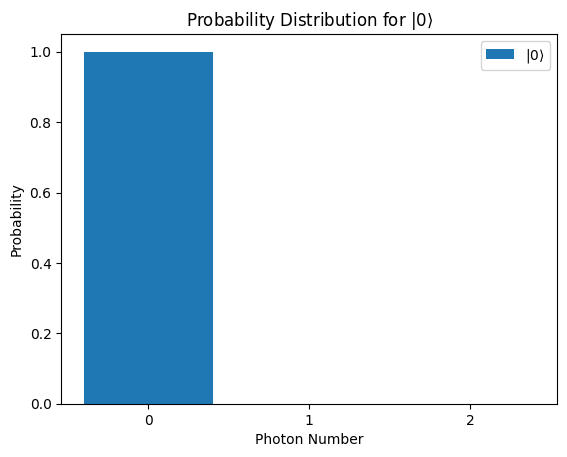

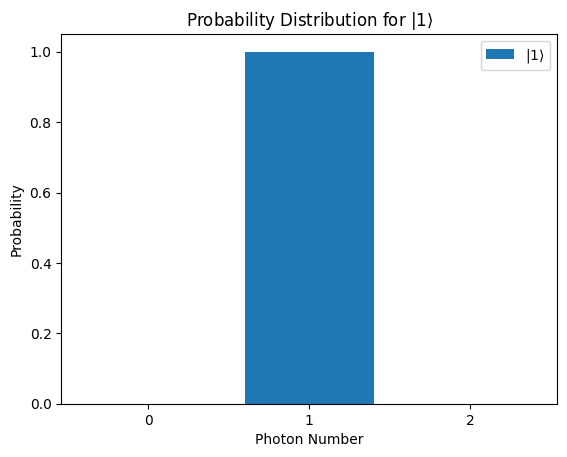

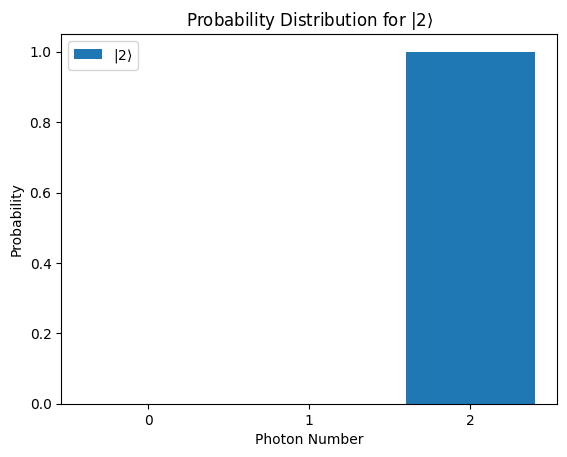

In [17]:
# prompt: plot the corresponding wavefunctions
# Hints: Use state.full().flatten()**2 in a bar plot for plotting

import matplotlib.pyplot as plt
import qutip

# Assuming you have already defined the create_fock_state function and have fock_0, fock_1, and fock_2
# as defined in the provided code.

# Example usage:
states = [fock_0, fock_1, fock_2]
labels = [r"$|0\rangle$", r"$|1\rangle$", r"$|2\rangle$"]

for i, state in enumerate(states):
    probs = state.full().flatten()**2  # Probability distribution

    plt.figure()
    plt.bar(range(len(probs)), probs, label=labels[i])
    plt.xlabel("Photon Number")
    plt.ylabel("Probability")
    plt.title(f"Probability Distribution for {labels[i]}")
    plt.xticks(range(len(probs)))
    plt.legend()
    plt.show()


## Exercise 2.2 - Creating Coherent States

In [18]:
# prompt: Generate a coherent state using the function from Excercise 1 with alpha=1.5

alpha = 1.5
coherent_state = create_coherent_state(alpha, 10) # Example dimension
coherent_state


Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.32465246]
 [0.48697874]
 [0.5165186 ]
 [0.44732051]
 [0.3354782 ]
 [0.2251005 ]
 [0.13763368]
 [0.07873768]
 [0.03969757]
 [0.02511919]]

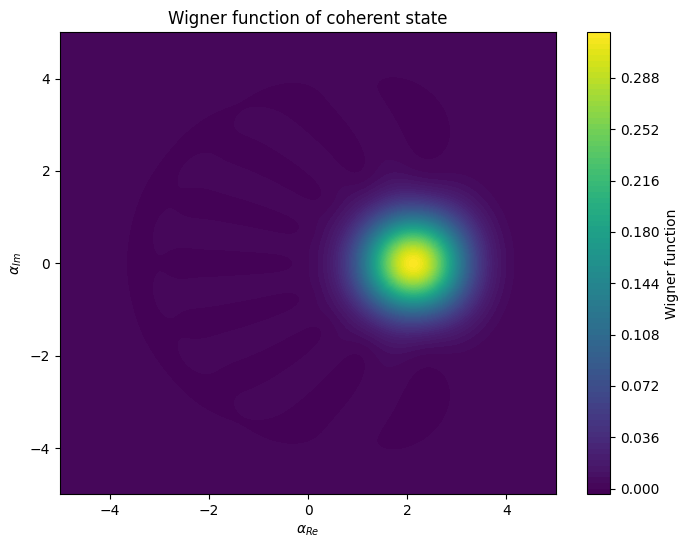

In [19]:
# prompt: visualize its Wigner function using matplotlibs contourf

import qutip
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined the create_coherent_state function
# and have the coherent_state as defined in the previous code.

# Calculate the Wigner function using the example's method
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(coherent_state, x, y)  # Use qutip.wigner

# Visualize the Wigner function using contourf
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 100)  # Use X, Y, Z here
plt.colorbar(contour, label='Wigner function')
plt.xlabel(r'$\alpha_{Re}$')
plt.ylabel(r'$\alpha_{Im}$')
plt.title('Wigner function of coherent state')
plt.show()

## Exercise 2.3 - Creating Squeezed Vacuum States

In [20]:
# prompt: Generate a vacuum Fock state with any Hilbert Dimension (e.g. 10) and a number state of 0

import qutip

# Define the Hilbert space dimension
hilbert_dimension = 10

# Create a vacuum Fock state (number state with n=0)
vacuum_state = qutip.fock(hilbert_dimension, 0)

# Print the vacuum state
vacuum_state


Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [21]:
# prompt: Generate a product state (*) of the squeeze state (same Hilbert dimension) and the squeezing parameter r with the vacuum Fock state.

# Define the squeezing parameter
r = 0.5  # Example value

# Create the squeezed vacuum state
squeezed_vacuum_state = qutip.squeeze(hilbert_dimension, r)

# Calculate the tensor product of the squeezed state and the vacuum state
product_state = qutip.tensor(squeezed_vacuum_state, vacuum_state)

# Print the product state
product_state


Quantum object: dims=[[10, 10], [10, 1]], shape=(100, 10), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.9417114   0.          0.30769784  0.          0.12336155  0.
   0.05079296  0.          0.02652701  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.

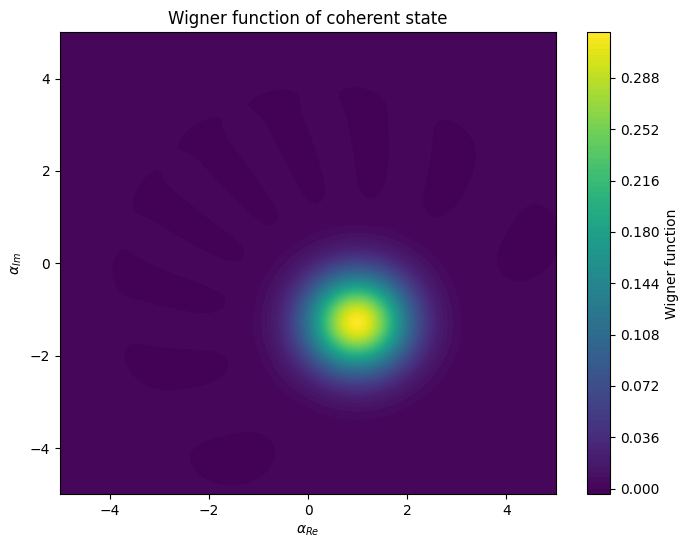

In [22]:
# prompt: now plot the Wigner function

import qutip
from typing import cast
import warnings
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined the create_coherent_state function
# and have the coherent_state as defined in the previous code.

# Example usage with a slider for alpha
alpha_real = 0.7 #@param {type:"slider", min:-2, max:2, step:0.1}
alpha_imag = -0.9 #@param {type:"slider", min:-2, max:2, step:0.1}

alpha = complex(alpha_real, alpha_imag)
coherent_state = create_coherent_state(alpha, 10)

# Calculate the Wigner function using the example's method
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(coherent_state, x, y)  # Use qutip.wigner

# Visualize the Wigner function using contourf
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, 100)  # Use X, Y, Z here
plt.colorbar(contour, label='Wigner function')
plt.xlabel(r'$\alpha_{Re}$')
plt.ylabel(r'$\alpha_{Im}$')
plt.title('Wigner function of coherent state')
plt.show()


# Exercise 3 - Interactive Quantum Circuit Prompt

1. **Two modes**, each with squeezed state ($r=0.5$).

2. **Phase shift** of $\pi/2$ applied to Mode 2

3. A **50:50 beamsplitter** to mix the two modes

*like a Michelson interferometer with non-classical correlations*

4. *Photon counting measurement* to detect the photon number in each mode



In [23]:
import strawberryfields as sf
from strawberryfields import ops
import numpy as np
import matplotlib.pyplot as plt

# Create a 2-mode quantum photonic circuit
n_modes = 2
eng = sf.Engine(backend='fock', num_subsystems=n_modes)

# Define the circuit
with eng:
    # Squeezing (r = 0.5) for both modes
    ops.S2gate(0.5) | 0  # Mode 1
    ops.S2gate(0.5) | 1  # Mode 2

    # Phase shift (theta = pi/2) on Mode 2
    ops.Rgate(np.pi/2) | 1

    # Beamsplitter (50:50 mix) between Mode 1 and Mode 2
    ops.BSgate(np.pi/4) | (0, 1)

    # Photon counting measurement on both modes
    ops.MeasureFock() | 0
    ops.MeasureFock() | 1

# Run the simulation
result = eng.run()

# Retrieve and plot the photon number counts for both modes
photon_counts_mode_1 = result.samples[0]
photon_counts_mode_2 = result.samples[1]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mode 1 photon counts
ax[0].hist(photon_counts_mode_1, bins=20, color='blue', alpha=0.7)
ax[0].set_title("Photon Counts - Mode 1")
ax[0].set_xlabel("Number of photons")
ax[0].set_ylabel("Frequency")

# Mode 2 photon counts
ax[1].hist(photon_counts_mode_2, bins=20, color='red', alpha=0.7)
ax[1].set_title("Photon Counts - Mode 2")
ax[1].set_xlabel("Number of photons")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


ImportError: cannot import name 'simps' from 'scipy.integrate' (/usr/local/lib/python3.11/dist-packages/scipy/integrate/__init__.py)

Ignoring the simps error (I spent a while trying to fix that), there are type errors. Here's the prompt that would theoretically work:

## Modified Prompt

"I want to design a quantum photonic circuit using Strawberry Fields in Python. Please guide me step by step by asking interactive questions to define the circuit based on my requirements. Here’s how I’d like you to proceed:

1.  **Quantum Problem:** Ask me what type of quantum problem I want to solve (e.g., quantum teleportation, Gaussian boson sampling, entanglement generation).
2.  **Mode and Photon States:** Help me choose the number of modes (n_modes: int) and photon states (cutoff_dim: int) required for the circuit. Ensure that these are integers.
3.  **Quantum Operations:** Assist me in selecting quantum operations (e.g., squeezing, displacement, beamsplitters, phase shifts, Kerr interaction). For each operation, specify the required parameters and their data types (e.g., squeezing parameter r: float, phase shift theta: float).
4.  **Measurements:** Guide me in setting up appropriate measurements (e.g., homodyne, photon counting, heterodyne). Specify the measurement type and the modes to be measured (mode: int).
5.  **Python Code with Type Annotations:** Once all parameters are determined, generate the complete Strawberry Fields Python code for the circuit. Use type annotations for all variables and function parameters. Ensure that the code is well-structured and easy to understand.
6.  **Visualization:** Include a section to visualize the output state or measurement results using Matplotlib or QuTiP. Label all axes and provide clear titles.
7.  **Error Handling:** Include basic error handling to check for invalid input values or potential errors during circuit execution. If an error is detected, print a descriptive error message.
8.  **Example type annotations:**
    * n_modes: int = 2
    * r: float = 0.5
    * theta: float = np.pi/2
    * def beamsplitter(phi: float, mode_a: int, mode_b: int) -> None:
        ops.BSgate(phi) | (mode_a, mode_b)

In [24]:
import strawberryfields as sf
from strawberryfields import ops
import numpy as np
import matplotlib.pyplot as plt

# Create a 2-mode quantum photonic circuit
n_modes = 2
eng = sf.Engine(backend='fock', num_subsystems=n_modes)

# Define the circuit
with eng:
    # Squeezing (r = 0.5) for both modes
    ops.S2gate(0.5) | 0  # Mode 1
    ops.S2gate(0.5) | 1  # Mode 2

    # Phase shift (theta = pi/2) on Mode 2
    ops.Rgate(np.pi/2) | 1

    # Beamsplitter (50:50 mix) between Mode 1 and Mode 2
    ops.BSgate(np.pi/4) | (0, 1)

    # Photon counting measurement on both modes
    ops.MeasureFock() | 0
    ops.MeasureFock() | 1

# Run the simulation
result = eng.run()

# Retrieve and plot the photon number counts for both modes
photon_counts_mode_1 = result.samples[0]
photon_counts_mode_2 = result.samples[1]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mode 1 photon counts
ax[0].hist(photon_counts_mode_1, bins=20, color='blue', alpha=0.7)
ax[0].set_title("Photon Counts - Mode 1")
ax[0].set_xlabel("Number of photons")
ax[0].set_ylabel("Frequency")

# Mode 2 photon counts
ax[1].hist(photon_counts_mode_2, bins=20, color='red', alpha=0.7)
ax[1].set_title("Photon Counts - Mode 2")
ax[1].set_xlabel("Number of photons")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


ImportError: cannot import name 'simps' from 'scipy.integrate' (/usr/local/lib/python3.11/dist-packages/scipy/integrate/__init__.py)

## Analysis

ChatGPT asked me clearer questions mentioning the data type.

Example question:\
What values would you like to use for:
- n_modes (integer)

- cutoff_dim (integer)

It also didnt ask me as many questions to customize the operation more. The first prompt led ChatGPT to asking about customizing the phase shift and beamsplitter ratio. This seems like something a human (I) would do. The first attempt is overambitious and when something unrelated makes it hard, it went the simple route. The prompts were on two different tabs for ChatGPT, but it could have been connected by my account.

This interaction gave me a better idea of what squeezing and modes are. At one point I asked if this was similar to the classical Michelson interferometer because it was explaining the use of a beamsplitter. This helped me understand quantum mechanics a bit more because I tend to have trouble visualizing it.

I felt I could ask any question while it was explaining things. It is much more comfortable to ask AI than asking a professor, but if something seems fishy, I know to find a real expert. This was a nice side hunt into quantum photonic circuits and Strawberry Fields.